#### 1850200-黄天洋-第九周实验课-申优
# 实践课9
## 1&emsp;内容
#### 1.&emsp;高维积分，矩形区域。

In [29]:
import numpy as np

#二重积分复合Simpson公式
def highdim(f,a,b,n):
    hx=(b[0]-a[0])/n/2
    hy=(b[1]-a[1])/n/2
    dx=np.linspace(a[0],b[0],2*n+1)
    dy=np.linspace(a[1],b[1],2*n+1)
    quad1=(f(dx[0],dy[0])+2*np.sum(f(dx[2:2*n-1:2],dy[0]))
          +4*np.sum(f(dx[1:2*n:2],dy[0]))+f(dx[2*n],dy[0])
          +2*np.sum(f(dx[0],dy[2:2*n-1:2]))+2*np.sum(f(dx[2*n],dy[2:2*n-1:2]))
          +4*np.sum(f(dx[0],dy[1:2*n:2]))+4*np.sum(f(dx[2*n],dy[1:2*n:2]))
          +f(dx[0],dy[2*n])+2*np.sum(f(dx[1:2*n:2],dy[2*n]))
          +4*np.sum(f(dx[1:2*n:2],dy[2*n]))+f(dx[2*n],dy[2*n]))
    quad2=0
    for i in range(n-1):
        quad2=quad2+4*np.sum(f(dx[2:2*n-1:2],dy[2*i+2]))+8*np.sum(f(dx[1:2*n:2],dy[2*i+2]))
    quad3=0
    for j in range(n):
        quad3=quad3+8*np.sum(f(dx[2:2*n-1:2],dy[2*j+1]))+16*np.sum(f(dx[1:2*n:2],dy[2*j+1]))
    
    return (quad1+quad2+quad3)*hx*hy/9

#计算sin(x+y)在[0,1]x[0,1]上积分
f=lambda x,y:np.sin(x+y)
a=[0,0]
b=[np.pi/4,np.pi/2]
n=500
print('sin(x+y)在[0,pi/2]x[0,pi/4]上的积分为：',highdim(f,a,b,n))

sin(x+y)在[0,pi/2]x[0,pi/4]上的积分为： 1.0000002340446086


#### 2.&emsp;蒙特卡洛计算积分

In [30]:
import numpy as np

#蒙特卡洛n维求积
def montecarlo(f,a,b,n):
    ndim=np.size(a)
    quad=0
    h=1
    for i in range(ndim):
        h=h*(b[i]-a[i])
    k=0
    while k<n:
        dx=np.zeros(ndim)
        for i in range(ndim):
            dx[i]=dx[i]+np.random.rand()*(b[i]-a[i])+a[i]
        quad=quad+f(dx)
        k=k+1
    quad=quad*h/n
    return quad

#计算sin(x+y)在[0,1]x[0,1]上积分
f=lambda x:np.sin(x[0]+x[1])
a=[0,0]
b=[np.pi/4,np.pi/2]
n=500
print('sin(x+y)在[0,pi/2]x[0,pi/4]上的积分为：',montecarlo(f,a,b,n))

sin(x+y)在[0,pi/2]x[0,pi/4]上的积分为： 1.0034239519738937


#### 3. 积分方程。

In [87]:
import numpy as np
from numpy.linalg import solve

#复合辛普森公式
def compound_simpson(f,a,b,n):
    h=(b-a)/n
    x=np.linspace(a,b,2*n+1)
    y=f(x)
    quad=h/6*(y[0]+2*np.sum(y[2:2*n-1:2])+4*np.sum(y[1:2*n:2])+y[2*n])
    return quad

#积分方程求解
def int_solve(f,g,a,b,n):
    A=np.zeros((n+1,n+1))
    Y=np.zeros(n+1)
    dx=np.linspace(a,b,n+1)
    for i in range(n+1):
        for j in range(n+1):
            A[i,j]=dx[i]**(n-j)
        y=lambda x:g(dx[i],x)
        Y[i]=f(dx[i])/compound_simpson(y,a,b,n)
    s=solve(np.mat(A),np.mat(Y).T).getA().reshape(1,-1)[0]
    return np.poly1d(s)

def f(x):
    return ((x**2+1)**(3/2)-x**3)/3
def g(s,x):
    return (s**2+x**2)**0.5
print('求解右端((x^2+1)^1.5-x^3)/3，左端(x^2+s^2)^0.5在[0,1]上积分的方程，取n=10：')
print(int_solve(f,g,0,1,10))

求解右端((x^2+1)^1.5-x^3)/3，左端(x^2+s^2)^0.5在[0,1]上积分的方程，取n=10：
        10         9         8         7         6         5         4
-2.837 x  + 15.95 x - 39.58 x + 57.45 x - 54.71 x + 36.67 x - 18.21 x
          3         2
 + 6.787 x - 1.614 x - 0.02629 x + 0.6667


#### 4.&emsp;函数*integrate.quad(func,a,b,args,full_output)*

In [27]:
import numpy as np
from scipy.integrate import quad

#积分quad求sinx/x积分
val,err=quad(lambda x:np.sin(x)/x,
             0,
             2)
print ('sinx/x在[0,2]上的积分为：',val)

sinx/x在[0,2]上的积分为： 1.6054129768026946


#### 5.&emsp;函数*integrate.dblquad(func,a,b,gfun,hfun,args,epsabs,epsrel)*

In [31]:
import numpy as np
from scipy.integrate import dblquad

#二重积分dbl求sin(x+y)积分
val,err=dblquad(lambda x,y:np.sin(x+y),
             0,
             np.pi/2,
             lambda x:0,
             lambda x:np.pi/4)
print ('sin(x+y)在[0,pi/2]x[0,pi/4]上的积分为：',val)

sin(x+y)在[0,pi/2]x[0,pi/4]上的积分为： 0.9999999999999999


#### 6.&emsp;函数*integrate.tplquad(func,a,b,gfun,hfun,qfun,rfun,args,epsabs,epsrel)*

In [32]:
import numpy as np
from scipy.integrate import tplquad

#三重积分tpl求sin(-x-y-z)积分
val,err=tplquad(lambda x,y,z:np.sin(-x-y-z),
             0,
             1,
             lambda x:0,
             lambda x:1,
             lambda x,y:0,
             lambda x,y:1)
print ('sin(-x-y-z)在[0,1]x[0,1]x[0,1上的积分为：',val)

sin(-x-y-z)在[0,1]x[0,1]x[0,1上的积分为： -0.8793549306454008


## 2.&emsp;练习
#### 1.&emsp;分别取样本数$n=100,1000,10000$，用蒙特卡洛方法计算积分
$$(1)\int_0^2\int_0^1e^{-\frac{x_1^2+x_2^2}{2}}\dfrac{1}{1+x_1^2+x_2^2}dx_1dx_2
\qquad\qquad
(2)\int_{-\infty}^{+\infty}e^{-x^3}dx$$

In [33]:
import numpy as np

#蒙特卡洛求积函数
def montecarlo(f,a,b,n):
    ndim=np.size(a)
    quad=0
    h=1
    for i in range(ndim):
        h=h*(b[i]-a[i])
    k=0
    while k<n:
        dx=np.zeros(ndim)
        for i in range(ndim):
            dx[i]=dx[i]+np.random.rand()*(b[i]-a[i])+a[i]
        quad=quad+f(dx)
        k=k+1
    quad=quad*h/n
    return quad

print('（1）')
#n=100,1000,10000时使用蒙特卡洛计算积分
f1=lambda x:np.e**(-(x[0]**2+x[1]**2)/2)/(1+x[0]**2+x[1]**2)
a=np.array([0,0])
b=np.array([1,2])
print('n=100时，积分为：',montecarlo(f1,a,b,100))
print('n=1000时，积分为：',montecarlo(f1,a,b,1000))
print('n=10000时，积分为：',montecarlo(f1,a,b,10000))

print('（2）')
#n=100,1000,10000时使用蒙特卡洛计算积分（用10000代替极限）
f2=lambda x:np.e**(-x**3)
a=np.array([-10000])
b=np.array([10000])
print('n=100时，积分为：',montecarlo(f2,a,b,100))
print('n=1000时，积分为：',montecarlo(f2,a,b,1000))
print('n=10000时，积分为：',montecarlo(f2,a,b,10000))

（1）
n=100时，积分为： 0.6533763190046509
n=1000时，积分为： 0.5777678673391308
n=10000时，积分为： 0.5761347717397463
（2）
n=100时，积分为： [inf]
n=1000时，积分为： [inf]
n=10000时，积分为： [inf]


C:\Users\mpure\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in power


#### 2.&emsp;计算如下积分

$$(1)\int_0^1\int_0^1\sin(-\sum_{i=1}^2x_i)dx_1dx_2$$

$$(2)\int_0^1\int_0^1\int_0^1\sin(-\sum_{i=1}^3x_i)dx_1dx_2dx_3$$

$$(3)\int_0^1\int_0^1\int_0^1\int_0^1\sin(-\sum_{i=1}^4x_i)dx_1dx_2dx_3dx_4$$

In [34]:
import numpy as np
from scipy.integrate import dblquad
from scipy.integrate import tplquad
from scipy.integrate import nquad

#分别使用dbl,tpl,nquad计算二、三、四重积分
val1,err1=dblquad(lambda x,y:np.sin(-x-y),
             0,
             1,
             lambda x:0,
             lambda x:1)
val2,err2=tplquad(lambda x,y,z:np.sin(-x-y-z),
             0,
             1,
             lambda x:0,
             lambda x:1,
             lambda x,y:0,
             lambda x,y:1)
val3,err3=nquad(lambda x1,x2,x3,x4:np.sin(-x1-x2-x3-x4),
               [np.array([0,1]),np.array([0,1]),np.array([0,1]),np.array([0,1])])
print('（1）的结果为：',val1)
print('（2）的结果为：',val2)
print('（3）的结果为：',val3)

（1）的结果为： -0.7736445427901113
（2）的结果为： -0.8793549306454008
（3）的结果为： -0.768618094175107


#### 3.&emsp;计算如下积分

$$(1)\int_1^2\int_1^x\sin(x+y)dydx$$

$$(2)\iint\limits_D(x+y)dxdy,D=\left\{(x,y):x^2+2y^2=1\right\}$$

In [35]:
import numpy as np
from scipy.integrate import dblquad

#使用dbl计算二重积分
val1,err1=dblquad(lambda x,y:np.sin(x+y),
             1,
             2,
             lambda x:1,
             lambda x:x)
val2,err2=dblquad(lambda x,y:x+y,
             -1,
             1,
             lambda x:-np.sqrt((1-x**2)/2),
             lambda x:np.sqrt((1-x**2)/2))
print('（1）的结果为：',val1)
print('（2）的结果为：',val2)

（1）的结果为： 0.06487254230099047
（2）的结果为： 0.0


## 3&emsp;作业
#### **1.&emsp;蒙特卡洛方法计算积分**
实验目的：蒙特卡罗方法<br/>
实验内容：分别取样本数$n=100,1000,10000$，用蒙特卡罗方法计算积分
$$(\dfrac{1}{\sqrt{2\pi}})^2\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}e^{-\frac{x_1^2+x_2^2}{2}}\dfrac{1}{1+x_1^2+x_2^2}dx_1dx_2$$

In [46]:
import numpy as np

#蒙特卡洛求积函数
def montecarlo(f,a,b,n):
    ndim=np.size(a)
    quad=0
    h=1
    for i in range(ndim):
        h=h*(b[i]-a[i])
    k=0
    while k<n:
        dx=np.zeros(ndim)
        for i in range(ndim):
            dx[i]=dx[i]+np.random.rand()*(b[i]-a[i])+a[i]
        quad=quad+f(dx)
        k=k+1
    quad=quad*h/n
    return quad

f=lambda x:1/(2*np.pi)*np.e**(-(x[0]**2+x[1]**2)/2)/(1+x[0]**2+x[1]**2)
a=np.array([-10000,-10000])
b=np.array([10000,10000])
print('n=100时，积分结果为：',montecarlo(f,a,b,100))
print('n=1000时，积分结果为：',montecarlo(f,a,b,1000))
print('n=10000时，积分结果为：',montecarlo(f,a,b,10000))

n=100时，积分结果为： 0.0
n=1000时，积分结果为： 0.0
n=10000时，积分结果为： 0.0


#### **2.&emsp;积分方程求解**
实验目的：利用数值积分构造求解积分方程的数值解法<br/>
实验内容：考虑积分方程
$$\int_0^1(x^2+s^2)^\frac{1}{2}u(s)ds=\dfrac{(x^2+1)^\frac{3}{2}-x^3}{3},x\in\left[0,1\right]$$
按如下步骤求解该积分方程：<br/>
(1)将区间$\left[0,1\right]$等距离散：$0=x_0<x_1<\cdots<x_n=1$并设$u(x_i)\approx u_i,(i=0,1,\cdots,n)$记$U=(u_0,u_1,\cdots,u_n)^T$<br/>
(2)对于每个节$x_i$，其对应的线性方程可用复合辛普森公式近似替代
$$\int_0^1(x_i^2+s^2)^\frac{1}{2}u(s)ds=\dfrac{(x_i^2+1)^\frac{3}{2}-x_i^3}{3},i=0,1,\cdots,n$$
等号左边的积分项得到。于是，可得到线性方程组$AU=Y$ ，其中$A$为一个$n+1$阶方阵<br/>
(3)求解该方程组<br/>
分别取$n=4,8,16,32$进行计算，绘出相应的数值解图形，并分析系数矩阵$A$的条件数与$n$的关系

n=4时，数值解为：
         4         3          2
-0.2632 x + 0.582 x - 0.3115 x - 0.1429 x + 0.6667
系数矩阵A的条件数为： 686.4349418185968
n=8时，数值解为：
        8         7         6         5         4         3        2
-1.019 x + 4.987 x - 10.64 x + 13.07 x - 10.21 x + 5.142 x - 1.43 x - 0.03468 x + 0.6667
系数矩阵A的条件数为： 2009396.380041306
n=16时，数值解为：
        16        15        14             13             12
-280.9 x  + 2404 x  - 9464 x  + 2.274e+04 x  - 3.728e+04 x 
              11             10             9            8        7
 + 4.419e+04 x  - 3.913e+04 x  + 2.639e+04 x - 1.37e+04 x + 5490 x
         6         5         4        3         2
 - 1701 x + 408.9 x - 78.69 x + 13.4 x - 2.043 x - 0.01404 x + 0.6667
系数矩阵A的条件数为： 24217818295720.707
n=32时，数值解为：
           32             31             30             29
5.254e+06 x  - 4.599e+08 x  + 5.124e+09 x  - 2.801e+10 x 
              28             27             26            25
 + 9.591e+10 x  - 2.278e+11 x  + 3.943e+11 x  - 5.09e+11 x 
        

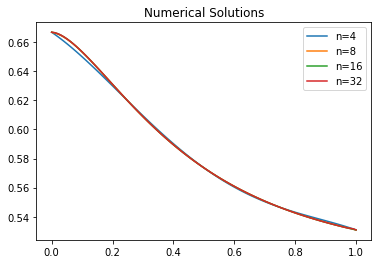

In [101]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

#复合辛普森公式
def compound_simpson(f,a,b,n):
    h=(b-a)/n
    x=np.linspace(a,b,2*n+1)
    y=f(x)
    quad=h/6*(y[0]+2*np.sum(y[2:2*n-1:2])+4*np.sum(y[1:2*n:2])+y[2*n])
    return quad

#积分方程求解
def int_solve(f,g,a,b,n):
    A=np.zeros((n+1,n+1))
    Y=np.zeros(n+1)
    dx=np.linspace(a,b,n+1)
    for i in range(n+1):
        for j in range(n+1):
            A[i,j]=dx[i]**(n-j)
        y=lambda x:g(dx[i],x)
        Y[i]=f(dx[i])/compound_simpson(y,a,b,n)
    s=solve(np.mat(A),np.mat(Y).T).getA().reshape(1,-1)[0]
    return np.poly1d(s),A

def f(x):
    return ((x**2+1)**(3/2)-x**3)/3
def g(s,x):
    return (s**2+x**2)**0.5
print('n=4时，数值解为：')
print(int_solve(f,g,0,1,4)[0])
print('系数矩阵A的条件数为：',np.linalg.cond(int_solve(f,g,0,1,4)[1]))
print('n=8时，数值解为：')
print(int_solve(f,g,0,1,8)[0])
print('系数矩阵A的条件数为：',np.linalg.cond(int_solve(f,g,0,1,8)[1]))
print('n=16时，数值解为：')
print(int_solve(f,g,0,1,16)[0])
print('系数矩阵A的条件数为：',np.linalg.cond(int_solve(f,g,0,1,16)[1]))
print('n=32时，数值解为：')
print(int_solve(f,g,0,1,32)[0])
print('系数矩阵A的条件数为：',np.linalg.cond(int_solve(f,g,0,1,32)[1]))
print('故系数矩阵A的条件数随n增大而增大')

#数值解绘图
xx=np.linspace(0,1,100)
plt.plot(xx,int_solve(f,g,0,1,4)[0](xx),label='n=4')
plt.plot(xx,int_solve(f,g,0,1,8)[0](xx),label='n=8')
plt.plot(xx,int_solve(f,g,0,1,16)[0](xx),label='n=16')
plt.plot(xx,int_solve(f,g,0,1,32)[0](xx),label='n=32')
plt.title('Numerical Solutions')
plt.legend()
plt.show()

#### **3.&emsp;高位积分的蒙特卡洛方法**
实验目的：高位积分的蒙特卡罗方法<br/>
实验内容：对于任意维区域$\Omega$，计算其测度的一般方法是：<br/>
找一个规则区域$A$包含$\Omega$，且$A$的测度是已知的，生成区域$A$中的$m$个均匀分布的随机点$pi,i=1,2,\cdots,m$，如果其中有$n$个落在区域$\Omega$中，则区域$\Omega$的测度等于$\dfrac{n}{m}$乘以区域$A$的测度。<br/>
而函数$f(x)$在区域$\Omega$上的积分可用如下公式近似计算：
$$\int_\Omega f(x)dx\approx \text{means}(\Omega)\times\dfrac{1}{n}\sum_{p_k\in\Omega}f(p_k)$$
其中$\text{means}(\Omega)$表示区域$\Omega$的测度<br/>
利用上述方法，计算冰淇淋的体积。假设冰淇淋的下部为一椎体，而上部为一球体，其中锥面为$z^2=x^2+y^2$，球面为$x^2+y^2+(z-1)^2=1$。区域$A$可选取为立方体
$$A=\left\{(x,y,z)\in R^3:x\in\left[-1,1\right],y\in\left[-1,1\right],z\in\left[0,2\right]\right\}$$

In [62]:
import numpy as np

#蒙特卡洛求积
a=np.array([-1,-1,0])
b=np.array([1,1,2])
it=100000
k=0
n=0
m=0
while k<it:
    p=np.zeros(3)
    for i in range(3):
        p[i]=np.random.rand()*(b[i]-a[i])+a[i]
    #若p落在冰激凌区域内则n+1
    if p[2]>=1:
        if p[0]**2+p[1]**2+(p[2]-1)**2<=1:
            n=n+1
    else:
        if p[0]**2+p[1]**2<=p[2]**2:
            n=n+1
    m=m+1
    k=k+1
print('冰激凌的体积为：',n/m*(2**3))

冰激凌的体积为： 3.14704
